In [1]:
import numpy as np

from sklearn import mixture
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm

In [20]:
FIG_PATH = "../presentation/figures"

In [105]:
def uniform(u):
    return 1/2 * (np.abs(u) < 1)
def triangle(u):
    return (1 - abs(u)) * (np.abs(u) < 1)
def epanechnikov(u):
    return 3/4 * (1 - u**2) * (np.abs(u) < 1)
def gaussian(u):
    return np.exp(-u**2 / 2) / np.sqrt(2 * np.pi)
def biweight(u):
    return 15/16 * (1 - u**2)**2 * (np.abs(u) < 1)
def triweight(u):
    return 35/32 * (1 - u**2)**3 * (np.abs(u) < 1)

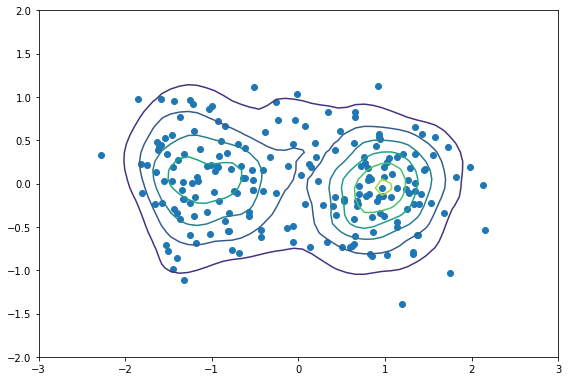

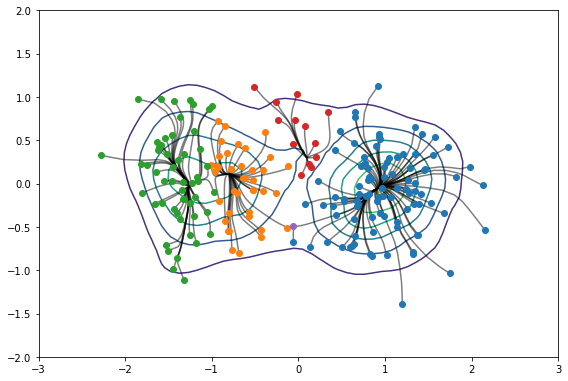

In [102]:
def figure_trajectories():
    np.random.seed(0)

    X_train, y_true = make_blobs(n_samples=200, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=[0.5, 0.5])

    h = 0.35 # 0.75 # 0.25
    
    
    def kde(X, Z, kernel, h):
        n, d = X.shape
        res = np.zeros(Z.shape[0])
        for i, x in enumerate(Z):
            w = np.array([kernel(np.sum(((x_i - x)/h)**2)) for x_i in X])
            res[i] = w.sum()
        return res

    def m(X, x, h):
        norm = np.sum(((X - x) / h)**2, axis=1)
        w = 0.5 * (norm < 1)
        # w = (1 - norm) * (norm < 1)
        w = gaussian(norm)
        return w @ X / w.sum()

    def get_its(x_start):
        x = x_start
        its = [x_start]
        for _ in range(50):
            x_new = m(X_train, x, h)
            its.append(x)
            if np.sum((x_new - x)**2) < 1e-5:
                break
            else:
                x = x_new
        return np.array(its)
    
    def connected_components(Z, epsilon=0.1):
        n, _ = Z.shape
        clusters = -np.ones(n, dtype=int)
        while np.any(clusters < 0):
            x = Z[clusters < 0][0]
            d = np.sqrt(np.sum((Z - x)**2, axis=1))
            clusters[d < epsilon] = np.max(clusters) + 1
        return clusters
    
    
    def plot_dataset():
        ax.scatter(X_train[:,0], X_train[:,1])

    def plot_kde():
        n = 20
        x = np.linspace(-3., 3., 3 * n)
        y = np.linspace(-2., 2., 2 * n)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T

        pdf = kde(X_train, XX, gaussian, h).reshape(X.shape)
        ax.contour(X, Y, pdf, antialiased=True)
    
    def plot_trajectories():
        Z = np.zeros(X_train.shape)
        for i, x_i in enumerate(X_train):
            its = get_its(x_i)
            Z[i] = its[-1]
            ax.plot(its[:,0], its[:,1], '-', color='black', alpha=0.5)

        return connected_components(Z)
    
    def plot_clustering(c):
        for i in np.unique(c):
            ax.scatter(X_train[c == i, 0], X_train[c == i, 1], zorder=10)
    

    fig, ax = plt.subplots(figsize=(8, 6))
    
    plot_dataset()
    plot_kde()
    
    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(8, 6))
        
    plot_kde()
    c = plot_trajectories()
    plot_clustering(c)
    
    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plt.show()


figure_trajectories()

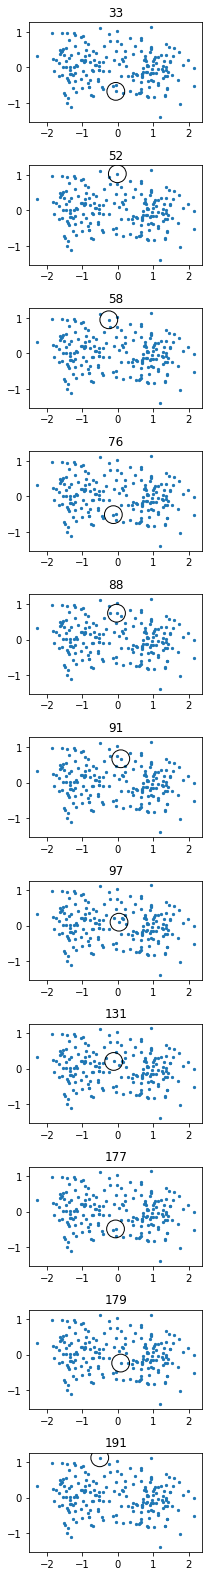

In [25]:
np.random.seed(0)
X_train, y_true = make_blobs(n_samples=200, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=[0.5, 0.5])
n, _ = X_train.shape

ids = [33, 52, 58, 76, 88, 91, 97, 131, 177, 179, 191]
k = len(ids)

fig, axes = plt.subplots(nrows=k, figsize=(4, 2 * k))

for i, ax in zip(ids, axes):
    ax.scatter(X_train[:, 0], X_train[:, 1], 5)
    ax.add_patch(Circle(X_train[i], 0.25, fill=False))
    ax.set_title(i)
    ax.set_aspect('equal', 'box')

fig.tight_layout()
plt.show()

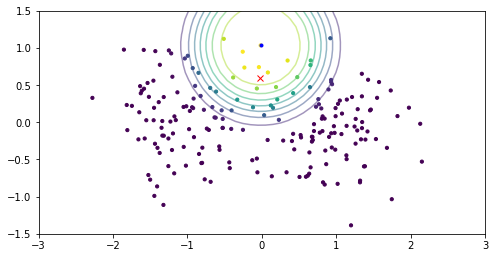

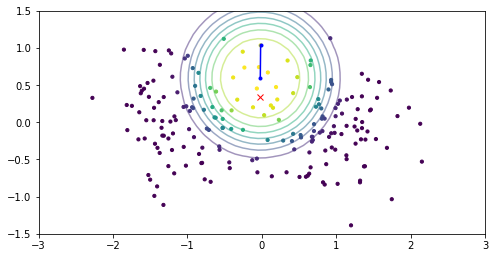

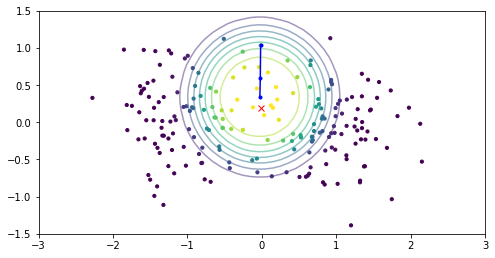

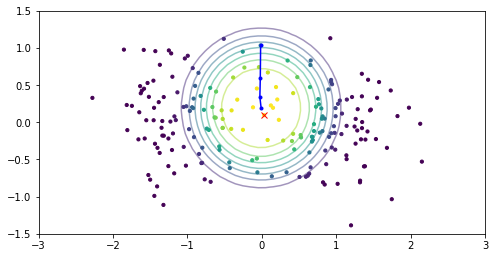

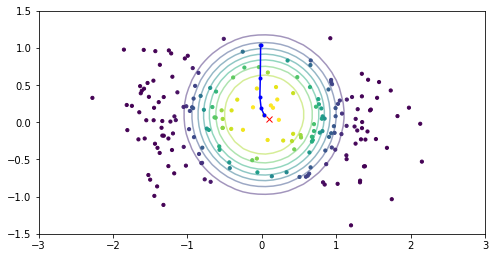

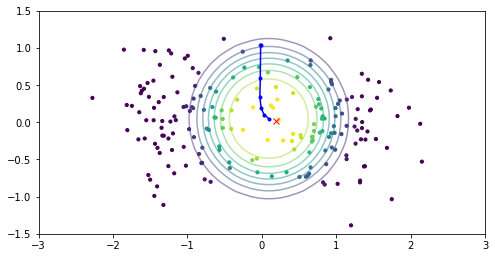

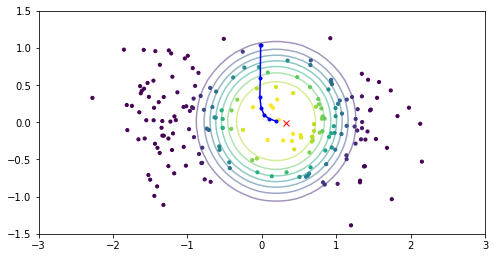

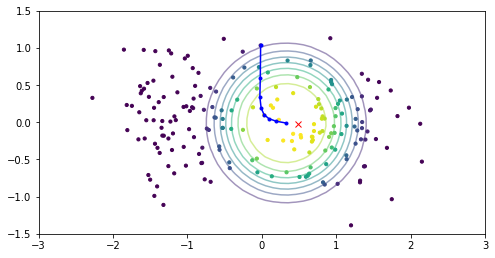

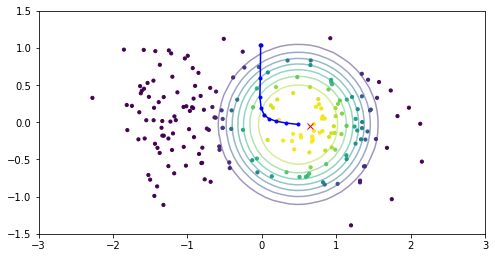

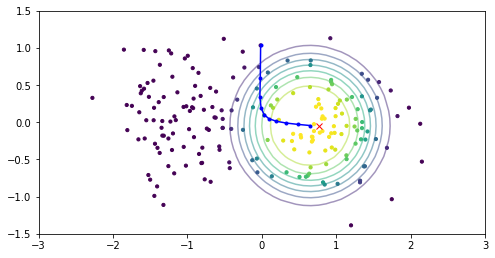

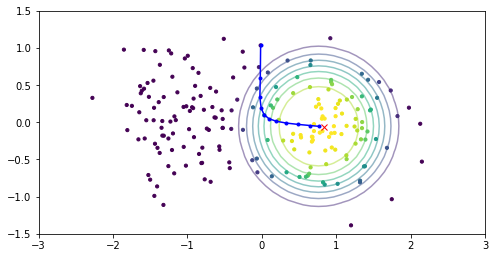

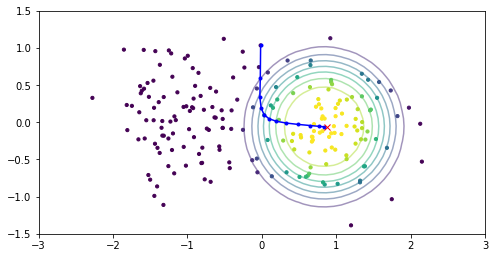

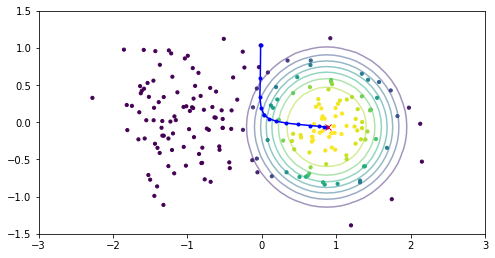

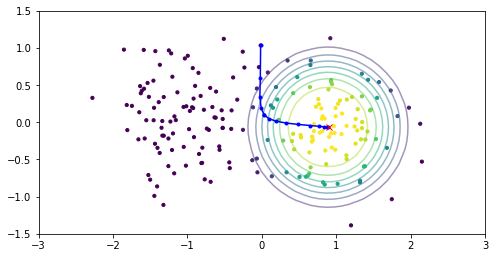

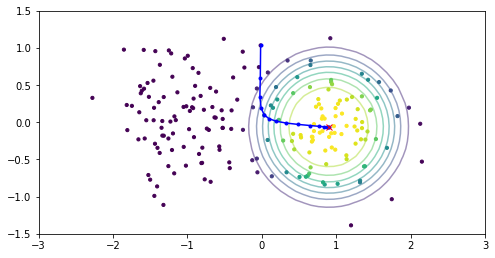

In [165]:
from matplotlib.animation import FuncAnimation

def figure_trajectories_animation():
    np.random.seed(0)
    X_train, y_true = make_blobs(n_samples=200, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=[0.5, 0.5])
    
    def kde(X, Z, kernel, h):
        n, d = X.shape
        res = np.zeros(Z.shape[0])
        for i, x in enumerate(Z):
            w = np.array([kernel(np.sum(((x_i - x)/h)**2)) for x_i in X])
            res[i] = w.sum()
        return res

    def m(X, x, kernel, h):
        norm = np.sum(((X - x) / h)**2, axis=1)
        w = kernel(norm)
        return w @ X / w.sum()

    def get_its(x_start, X, kernel, h):
        x = x_start
        its = []
        for _ in range(50):
            x_new = m(X, x, kernel, h)
            its.append(x)
            if np.sum((x_new - x)**2) < 1e-5:
                break
            else:
                x = x_new
        return np.array(its)
    
    def plot_kde():
        n = 20
        x = np.linspace(-3., 3., 3 * n)
        y = np.linspace(-2., 2., 2 * n)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T

        pdf = kde(np.array([its[i]]), XX, kernel, h).reshape(X.shape)
        ax.contour(X, Y, pdf, antialiased=True, alpha=0.5)
    
    
    kernel = gaussian
    h = 0.75 # 0.25
    
    
    its = get_its(X_train[52], X_train, kernel, h)
    for i in range(0, len(its)-1):
        fig, ax = plt.subplots(figsize=(8, 6))
        
        norm = np.sum(((X_train - its[i]) / h)**2, axis=1)
        c = kernel(norm)
        ax.scatter(X_train[:, 0], X_train[:, 1], s=10, c=(c / c.max()), label=r'$x_i$')
        
        ax.plot(its[:i+1,0], its[:i+1,1], 'b.-', label=r'$x^{(\tau)}$')
        #ax.add_patch(Circle(its[i], radius=h, fill=False, alpha=0.5))
        ax.plot(its[i+1,0], its[i+1,1], 'rx')
        
        plot_kde()

        ax.set_ylim((-1.5, 1.5))
        ax.set_aspect('equal', 'box')
        
        # fig.legend(loc=(0.8, 0.2))

        plt.savefig(f'{FIG_PATH}/iterations/step-{i+1}.pdf', dpi=300, transparent=True)
        plt.show()

figure_trajectories_animation()